# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.plotting.backend = "plotly"
sns.set(rc={'figure.figsize':(8,8)});

In [2]:
# Your code here. 
x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'X': x_values, 'Y': y_values})

student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

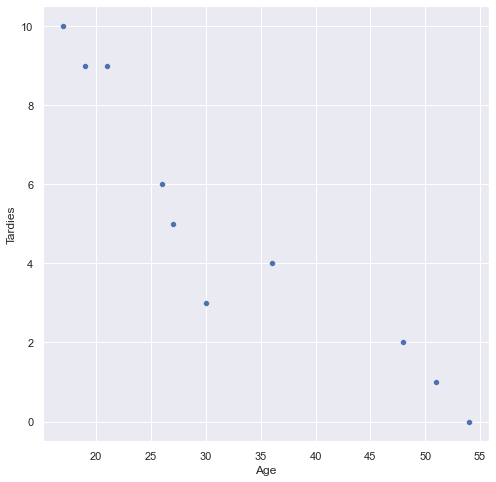

In [3]:
# Your code here.

sns.scatterplot(student_data.X,student_data.Y)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show();

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

    We can see a trend between Age and tardies, Tardies is inversely proportional to the Age.



Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [5]:
np.cov(student_data.X, student_data.Y)[0][1]

-45.56666666666666

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
x=sm.add_constant(student_data.X)

y=student_data.Y

modelo=sm.OLS(y, x).fit()

pred = modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.57e-05
Time:                        19:10:05   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
modelo.params

const    12.888803
X        -0.242821
dtype: float64

Plot your regression model on your scatter plot.

In [9]:
def plot_regression_model(x,y):
    
    x_const = sm.add_constant(x) # add a constant to the model
    
    modelo = sm.OLS(y, x_const).fit() # fit the model
    
    pred = modelo.predict(x_const) # make predictions
    
    print(modelo.summary())
    
    const = modelo.params[0] # create a variable with the value of the constant given by the summary
    coef = modelo.params[1] # create a variable with the value of the coef given by the summary
    
    x_l=np.linspace(x.min(), x.max(), 50) 
    y_l= coef*x_l + const # function of the line

    plt.figure(figsize=(10, 10))

    # plot the line
    plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}')

    # data
    plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}')

    plt.title('Regresion lineal')
    plt.xlabel(f'{x.name}')
    plt.ylabel(f'{y.name}')
    plt.legend()
    return plt.show();

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           5.57e-05
Time:                        19:10:05   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

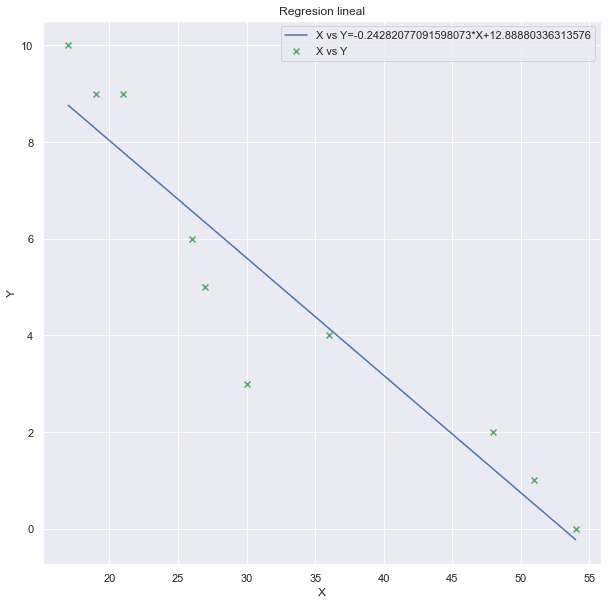

In [10]:
plot_regression_model(student_data.X, student_data.Y,)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

    Based on this results we can say that the Age is a good predictor for tardiness, at more age the probability of tardiness is lower.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

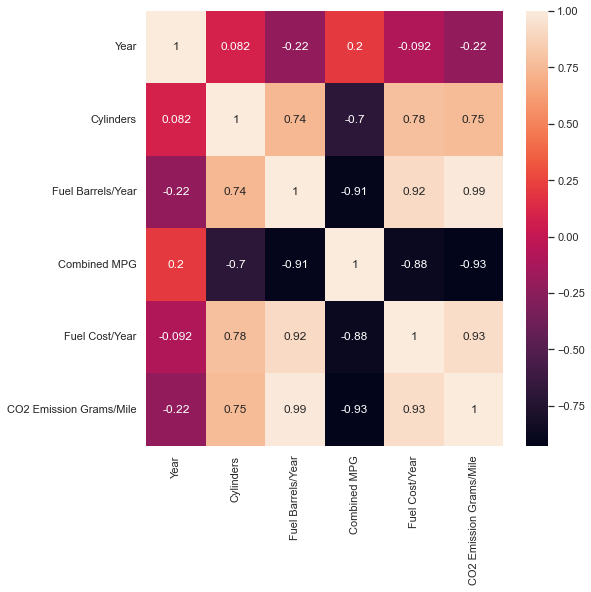

In [12]:
# Your response here. 
cars = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

sns.heatmap(cars.corr(), annot=True)
plt.show();

    The most important variable to predict the CO2 emissions is Fuel Barrels/Year, and the variable that is lower helpful is the Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here. 
x = cars.drop('CO2 Emission Grams/Mile', axis = 1)

y = cars['CO2 Emission Grams/Mile']

modelo=sm.OLS(y, x).fit()

pred = modelo.predict(x)

    *We decide an OLS because with it can make a summary an interpret the result with it.*

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [14]:
# Your response here. 
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):                        0.00
Time:                             19:10:06   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    Based on the results all the feactures have a pvalue = 0, so all of it have important significance on the model.
    

In [15]:
modelo.params

Year                  0.062994
Cylinders             0.887349
Fuel Barrels/Year    19.858822
Combined MPG         -3.050862
Fuel Cost/Year        0.029197
dtype: float64

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:10:06   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

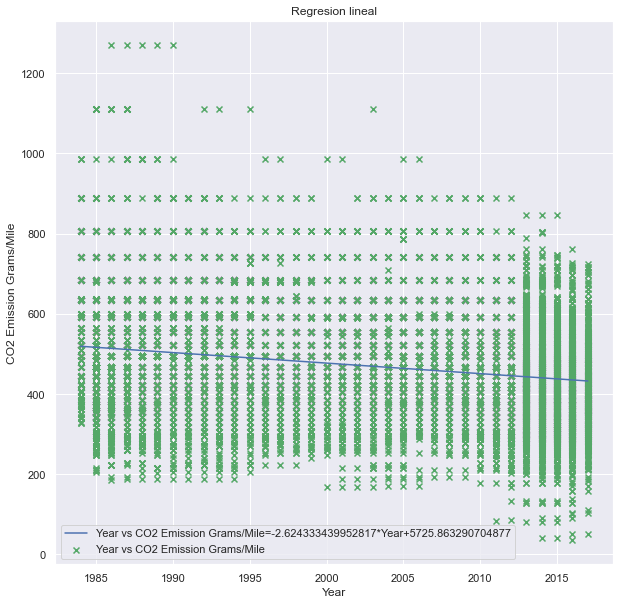

In [16]:
plot_regression_model(x.Year, y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                 4.690e+04
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:10:06   Log-Likelihood:            -2.0784e+05
No. Observations:                    35952   AIC:                         4.157e+05
Df Residuals:                        35950   BIC:                         4.157e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

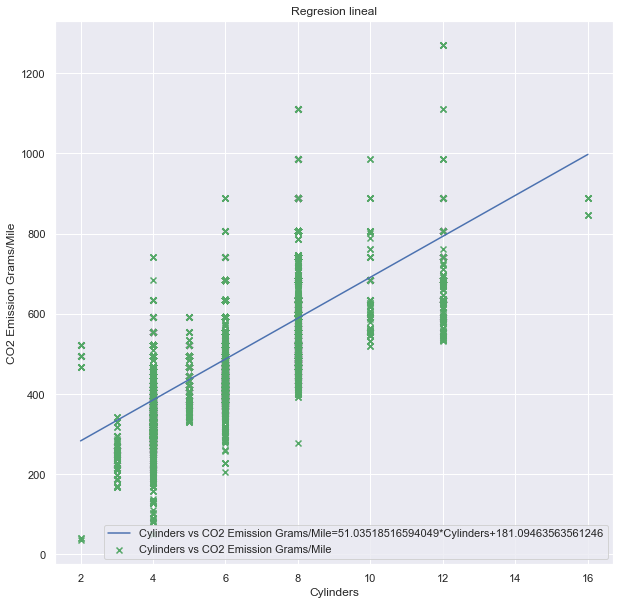

In [17]:
plot_regression_model(x.Cylinders, y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:10:07   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

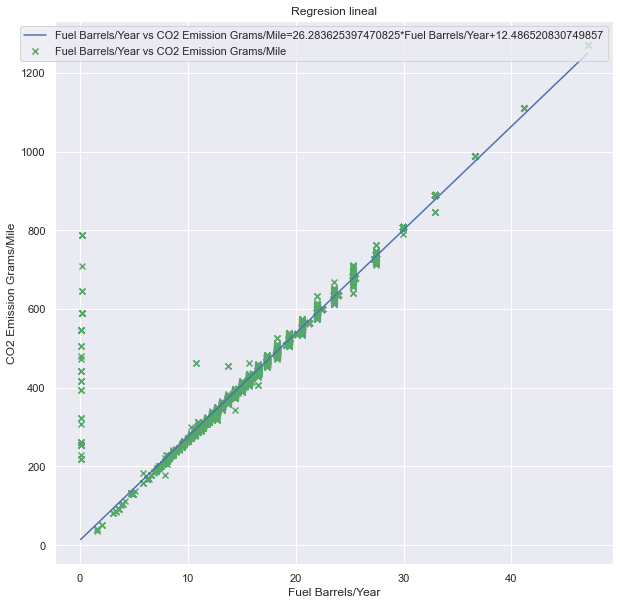

In [18]:
plot_regression_model(x['Fuel Barrels/Year'], y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                 2.170e+05
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:10:08   Log-Likelihood:            -1.8778e+05
No. Observations:                    35952   AIC:                         3.756e+05
Df Residuals:                        35950   BIC:                         3.756e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

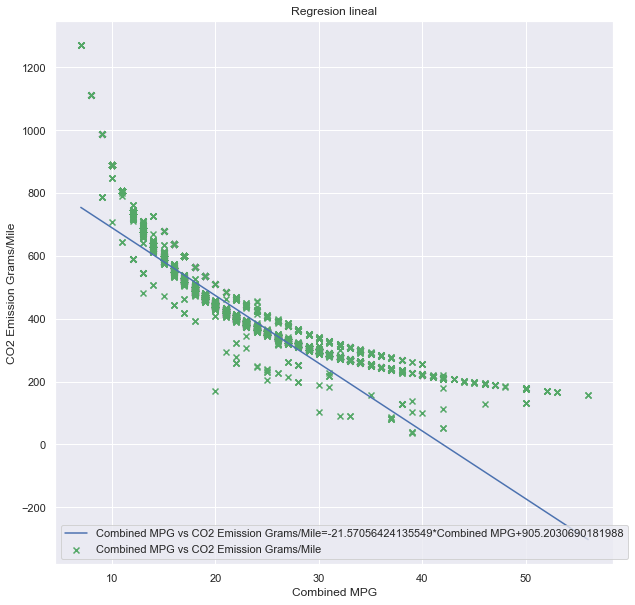

In [19]:
plot_regression_model(x['Combined MPG'], y)

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 2.334e+05
Date:                     Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:10:08   Log-Likelihood:            -1.8665e+05
No. Observations:                    35952   AIC:                         3.733e+05
Df Residuals:                        35950   BIC:                         3.733e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

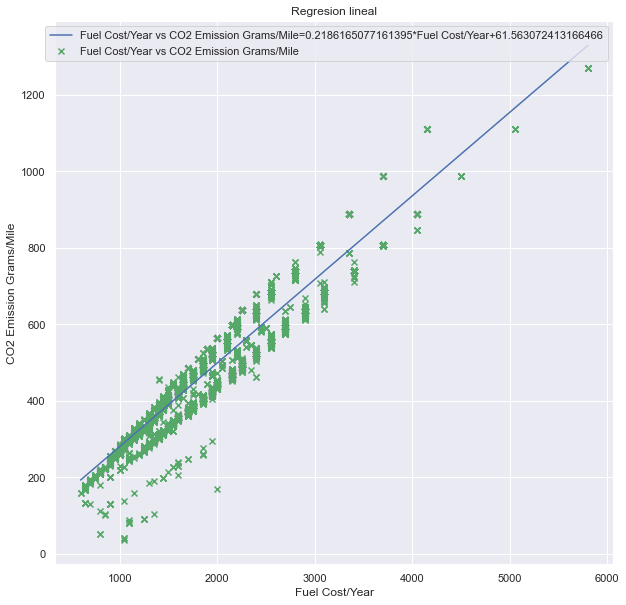

In [20]:
plot_regression_model(x['Fuel Cost/Year'], y)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
x_values = [1,3,4,6,8,9,11,14]
y_values = [1,2,4,4,5,7,8,13]

parties = pd.DataFrame({'X': x_values, 'Y': y_values})

parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           0.000102
Time:                        19:10:09   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

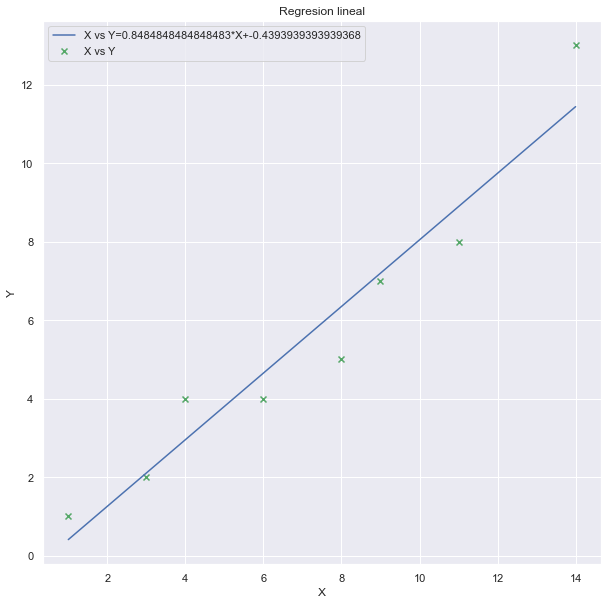

In [22]:
plot_regression_model(parties.X, parties.Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [23]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [24]:
# Your response here. 
stats = parties.describe().T
stats['IQR']=stats['75%']-stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
X,8.0,7.0,4.342481,1.0,3.75,7.0,9.50,14.0,5.75
Y,8.0,5.5,3.817254,1.0,3.50,4.5,7.25,13.0,3.75


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [25]:
def get_outliers(df: pd.DataFrame, stats: pd.DataFrame, threshold: float = 1.5) -> pd.DataFrame:
    
    """
    Esta funcion recibe un dataframe df.describe().T.
    
    Devuelve un dataframe.
    
    :param: stats, pd.DataFrame
    :param: threshold, umbral del test de tukey
    
    :return: pd.DataFrame
    """
    
    outliers=pd.DataFrame(columns=stats.index)

    for c in stats.index:

        iqr=stats.at[c, 'IQR']

        cutoff=threshold * iqr  # test tukey

        lower=stats.at[c, '25%'] - cutoff
        upper=stats.at[c, '75%'] + cutoff

        res=df[(df[c] < lower) | (df[c] > upper)].copy()

        res['outliers']=c

        outliers=outliers.append(res, sort=True)

    
    return outliers

In [26]:
outliers = get_outliers(parties, stats)

In [27]:
clean_index=[i for i in parties.index if i not in outliers.index]

In [28]:
clean_index

[0, 1, 2, 3, 4, 5, 6]

In [29]:
parties = parties.iloc[clean_index]
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           0.000264
Time:                        19:10:10   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

C:\Users\botic\anaconda3\envs\ironhack\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


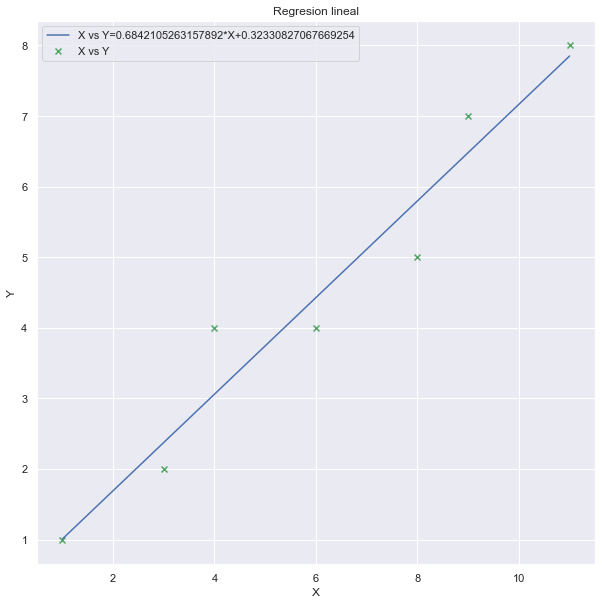

In [30]:
plot_regression_model(parties.X, parties.Y)